In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
np.random.seed(0)

# build a card set
red_cards = 26 * [1]
black_cards = 26 * [0]
unshuffled_deck = red_cards + black_cards

# shuffle the cards
shuffled_deck = np.random.permutation(unshuffled_deck)
print(shuffled_deck)

[0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1
 1 0 1 1 1 0 1 1 1 0 0 1 1 0 0]


In [3]:
def get_matching_event(event_condition: callable, sample_space):
    return set([outcome for outcome in sample_space if event_condition(outcome)])

def compute_high_confidence_interval(likelihoods, bin_width):
    peak_index = likelihoods.argmax()
    area = likelihoods[peak_index] * bin_width
    start_index, end_index = peak_index, peak_index + 1
    while area < 0.95:
        if start_index > 0:
            start_index -= 1
        if end_index < likelihoods.size - 1:
            end_index += 1 
        area = likelihoods[start_index: end_index + 1].sum() * bin_width

    range_start, range_end = bin_edges[start_index], bin_edges[end_index]
    range_string = f"{range_start: .6f} - {range_end: .6f}"
    print(f"The frequency range {range_string} represents a ",
          f"{100 * area: .2f}% confidence interval")
    return start_index, end_index

def compute_event_probability(event_condition, generic_sample_space):
    event = get_matching_event(event_condition, generic_sample_space)
    if type(generic_sample_space) == type(set()):
        return len(event) / len(generic_sample_space)
    event_size = sum(generic_sample_space[outcome] for outcome in event)
    return event_size / sum(generic_sample_space.values())

In [4]:
remaining_red_cards = 26
# 循环只取到第51张牌
for i, card in enumerate(shuffled_deck[:-1]):
    remaining_red_cards -= card
    remaining_total_cards = 52 - i - 1
    if remaining_red_cards / remaining_total_cards > 0.5:
        break

print(f"Stopping the game at index {i}.")
final_card = shuffled_deck[i + 1]
color = "red" if final_card else "black";
winning_state = 'won' if final_card else 'lost'
print(f"The next card in the deck is {color}")
print(f"We have {winning_state}")

Stopping the game at index 0.
The next card in the deck is black
We have lost


In [5]:
total_cards = 52
total_red_cards = 26
def execute_strategy(min_fraction_red=0.5, shuffled_deck=None, return_index=False):
    # 如果没洗牌，就先洗牌
    if shuffled_deck is None:
        shuffled_deck = np.random.permutation(unshuffled_deck)
    
    remaining_red_cards = total_red_cards

    for i, card in enumerate(shuffled_deck[:-1]):
        remaining_red_cards -= card
        fraction_red_cards = remaining_red_cards / (total_cards - i - 1)
        if fraction_red_cards > min_fraction_red:
            break

    return (i+1, shuffled_deck[i+1]) if return_index else shuffled_deck[i+1]

In [6]:
observation = np.array([execute_strategy() for _ in range(1000)])

frequency_wins = observation.mean()
print(f"The frequency of wins is {frequency_wins}")

dollars_won = frequency_wins * 1000
dollars_lost = (1 - frequency_wins) * 1000
total_profit = dollars_won - dollars_lost
print(f"Total profit is ${total_profit}")

The frequency of wins is 0.512
Total profit is $24.0


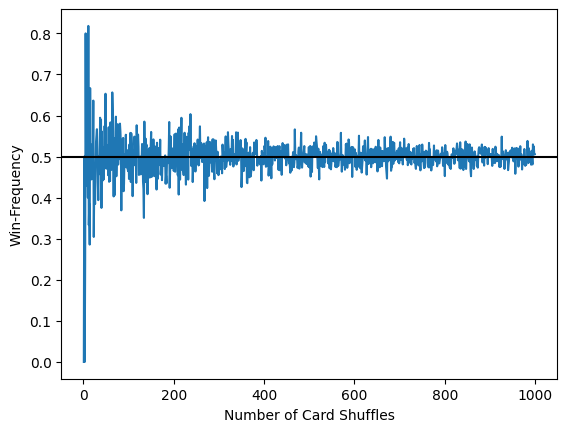

The win-frequency for 10000 shuffles is 0.5055055055055055


In [7]:
def repeat_game(number_repeats):
    observation = np.array([execute_strategy() for _ in range(number_repeats)])
    return observation.mean()

frequencies = []
for i in range(1, 1000):
    frequencies.append(repeat_game(i))
plt.plot(list(range(1, 1000)), frequencies)
plt.axhline(0.5, color='black')
plt.xlabel("Number of Card Shuffles")
plt.ylabel("Win-Frequency")
plt.show()
print(f"The win-frequency for 10000 shuffles is {frequencies[-1]}")

In [ ]:
frequency_array = np.array([repeat_game(10000) for _ in range(300)])
likelihoods, bin_edges, patches = plt.hist(frequency_array, 
                                           bins='auto', edgecolor='black', density=True)
bin_width = bin_edges[1] - bin_edges[0]
start_index, end_index = compute_high_confidence_interval(likelihoods, bin_width)

for i in range(start_index, end_index):
    patches[i].set_facecolor('yellow')
plt.xlabel("Binned Frequency")
plt.ylabel("Relative Likelihood")
plt.show()

In [9]:
import itertools
total_card = 10
total_red_cards = total_black_cards = int(total_card / 2)

unshuffled_deck = [1] * total_red_cards + [0] * total_black_cards
sample_space = set(itertools.permutations(unshuffled_deck))
win_condition = lambda x: execute_strategy(shuffled_deck=np.array(x))
prob_win = compute_event_probability(win_condition, sample_space)
print(f"Probability of a win is {prob_win}")

Probability of a win is 0.5


In [10]:
def scan_strategies():
    fractions = [value / 100 for value in range(50, 100)]
    probabilities = []
    for frac in fractions:
        win_condition = lambda x: execute_strategy(frac, shuffled_deck=np.array(x))
        probabilities.append(compute_event_probability(win_condition, sample_space))

    return probabilities

probabilities = scan_strategies()
print(f"Lowest probability of win is {min(probabilities)}")
print(f"Highest probability of win is {max(probabilities)}")

Lowest probability of win is 0.5
Highest probability of win is 0.5


In [11]:
for total_cards in [2, 4, 6, 8]:
    total_red_cards = int(total_cards / 2)
    total_black_cards = total_red_cards
    unshuffled_deck = [1] * total_red_cards + [0] * total_black_cards

    sample_space = set(itertools.permutations(unshuffled_deck))
    probabilities = scan_strategies()
    if all(prob == 0.5 for prob in probabilities):
        print(f"No winning strategy found for deck of size {total_cards}")

No winning strategy found for deck of size 2
No winning strategy found for deck of size 4
No winning strategy found for deck of size 6
No winning strategy found for deck of size 8


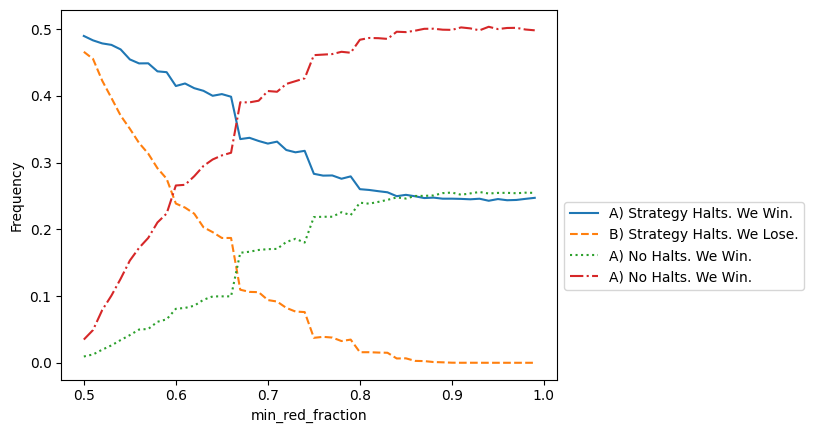

In [16]:
np.random.seed(0)
total_cards = 52
total_red_cards = 26
unshuffled_deck = red_cards + black_cards

def repeat_game_detailed(number_repeats, min_red_fraction):
    observations = [execute_strategy(min_red_fraction, return_index=True) 
                    for _ in range(number_repeats)]
    successes = [index for index, card in observations if card == 1]
    halt_success = len([index for index in successes if index != 51])
    no_halt_success = len(successes) - halt_success

    failures = [index for index, card in observations if card == 0]
    halt_failure = len([index for index in failures if index != 51])
    no_halt_failure = len(failures) - halt_failure
    result = [halt_success, halt_failure, no_halt_success, no_halt_failure]
    return [r / number_repeats for r in result]

fractions = [value / 100 for value in range(50, 100)]
num_repeats = 50000
result_types = [[], [], [], []]

for fraction in fractions:
    result = repeat_game_detailed(num_repeats, fraction)
    for i in range(4):
        result_types[i].append(result[i])

plt.plot(fractions, result_types[0], label="A) Strategy Halts. We Win.")
plt.plot(fractions, result_types[1], linestyle='--', label="B) Strategy Halts. We Lose.")
plt.plot(fractions, result_types[2], linestyle=':', label="C) No Halts. We Win.")
plt.plot(fractions, result_types[3], linestyle='-.', label="D) No Halts. We Lose.")

plt.xlabel("min_red_fraction")
plt.ylabel("Frequency")
plt.legend(bbox_to_anchor=(1.0, 0.5))
plt.show()